<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/Ensembles/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)

print(mnist.target)
print(mnist.data.shape)

['5' '0' '4' ... '4' '5' '6']
(70000, 784)


In [ ]:
import pandas as pd
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

X = mnist_df[0:5000]
Y = mnist.target[0:5000]
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2, random_state=30, stratify=Y)

# Default :

- the default value value of learning-rate of 1, n_estimators=50 is performing poorly.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

defaultClassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1)
)
defaultClassifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

0.585
0.5840902234458294


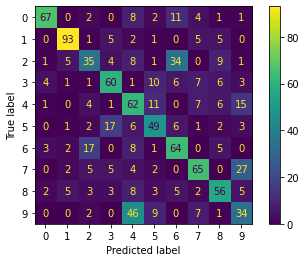

In [ ]:

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
x = plot_confusion_matrix(defaultClassifier, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,defaultClassifier.predict(X_test)))
print(metrics.f1_score(y_test,defaultClassifier.predict(X_test),average='macro'))

# Improved :
- Increasing the number of estimators and decreasing the learning rate helps.
- Caution : increase in n_estimators can lead to overfitting and decrease in learning rate increase the bias.  

In [ ]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators = 100,
    learning_rate = 0.1

)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

0.775
0.77217874064282


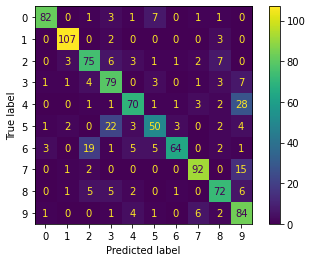

In [ ]:
x = plot_confusion_matrix(classifier, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,classifier.predict(X_test)))
print(metrics.f1_score(y_test,classifier.predict(X_test),average='macro'))

In [ ]:
classifier.estimators_[0:2]


[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=100672135, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1973874302, splitter='best')]

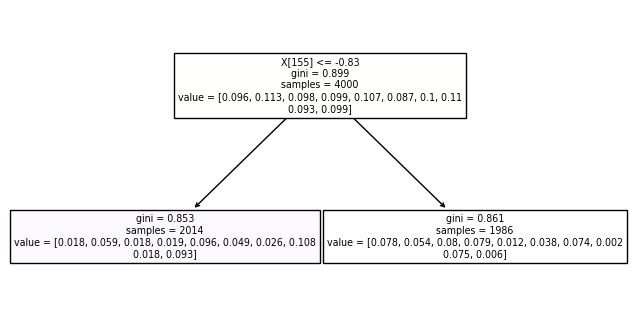

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(8,4),dpi=100)
plot_tree(classifier.estimators_[0], filled=True)
print() #to prevent information of tree being printed

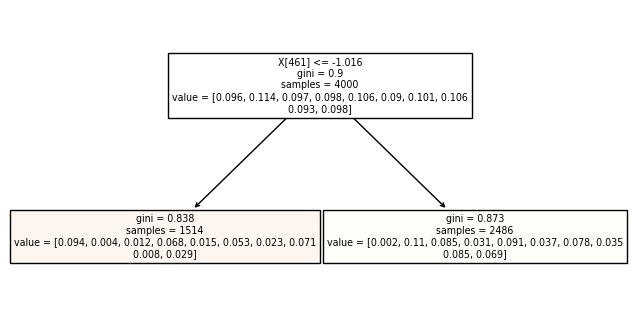

In [ ]:
plt.figure(figsize=(8,4),dpi=100)
plot_tree(classifier.estimators_[1], filled=True)
print() #to prevent information of tree being printed

# Complex base estimator :
- Although Adaboost works well with stumps but we can increase the complexity of base estimator.

In [ ]:
non_stump_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators = 100,
    learning_rate = 0.1

)
non_stump_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

0.844
0.8398808264046898


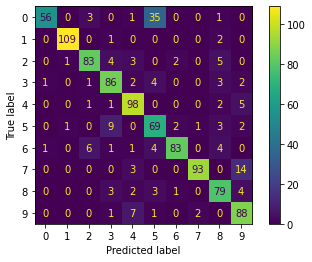

In [ ]:
x = plot_confusion_matrix(non_stump_classifier, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,non_stump_classifier.predict(X_test)))
print(metrics.f1_score(y_test,non_stump_classifier.predict(X_test),average='macro'))

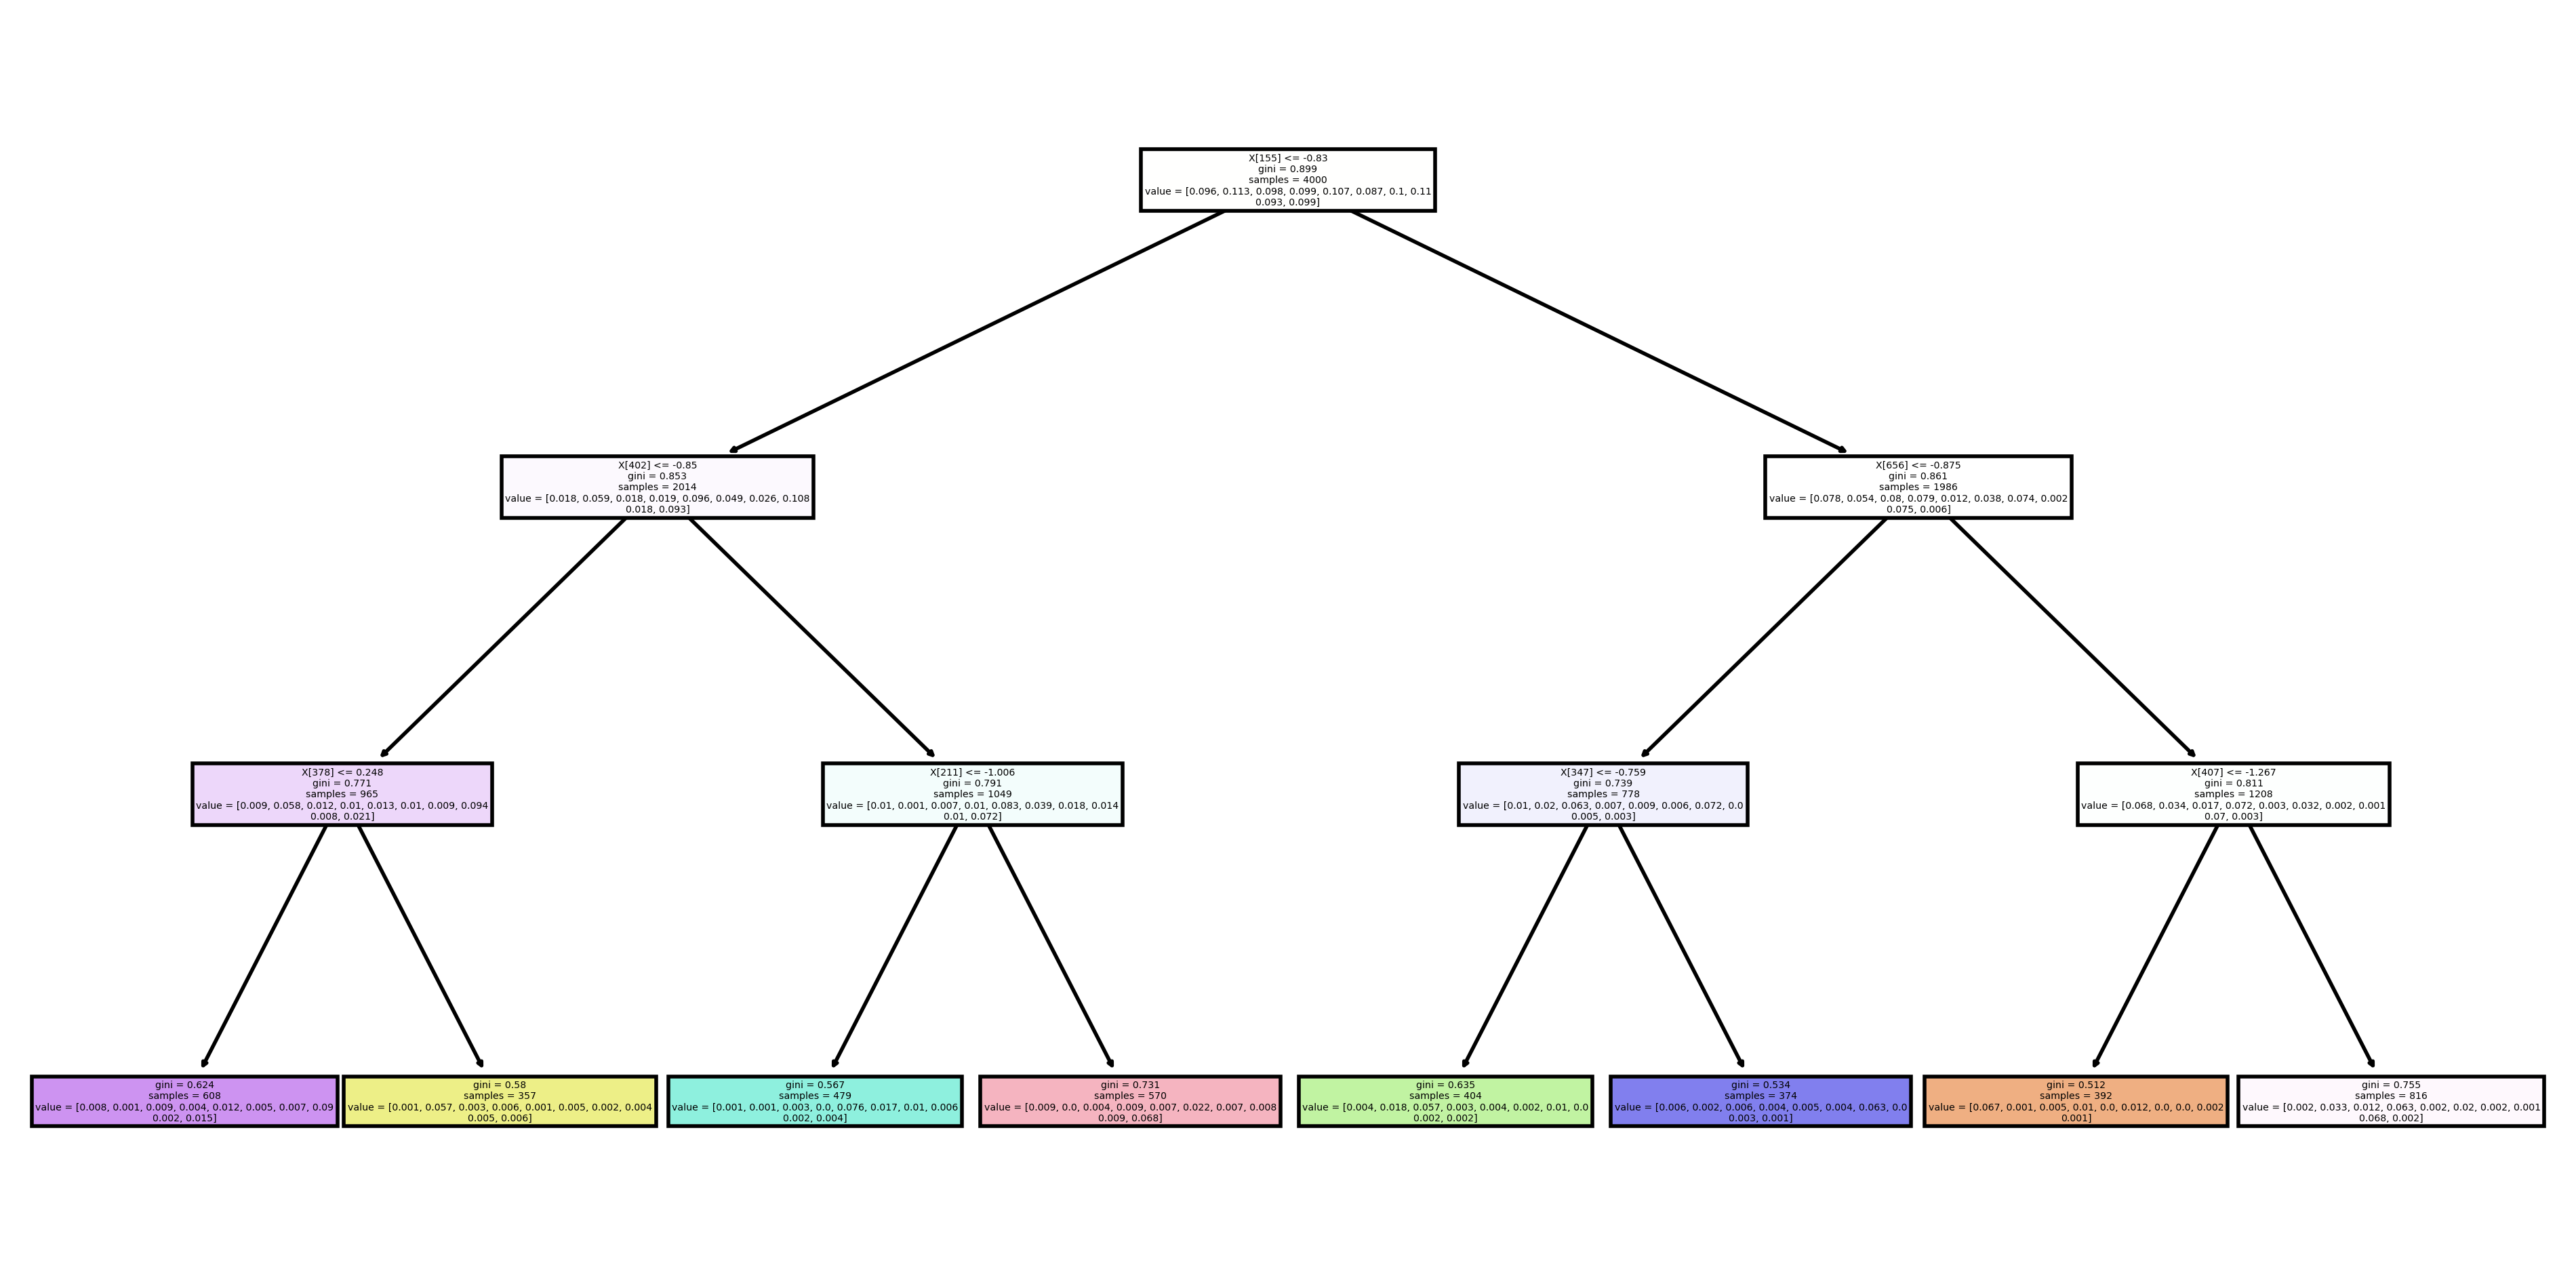

In [ ]:
plt.figure(figsize=(12,6),dpi=400)
plot_tree(non_stump_classifier.estimators_[0], filled=True)
print() #to prevent information of tree being printed

# Cross Validation :

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
scoring = {'Accuracy': 'accuracy'}

steps = [('estimator', AdaBoostClassifier())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

parameters = {
              'estimator__base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3),
                                           DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=5)],
              'estimator__n_estimators' : [100,200,300,400,500],
              'estimator__learning_rate':[0.001,0.05,0.1,0.2,0.3]
             }

grid_random = RandomizedSearchCV(pipeline, parameters, cv=2,refit='Accuracy', scoring=scoring, return_train_score=False,n_iter=25 )

grid_random.fit(X_train, y_train)
print(grid_random)

print("---------------------------------------------------------------------------------")
# examine the best model
print(grid_random.best_score_)
print(grid_random.best_params_)
print(grid_random.best_estimator_)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('estimator',
                                              AdaBoostClassifier(algorithm='SAMME.R',
                                                                 base_estimator=None,
                                                                 learning_rate=1.0,
                                                                 n_estimators=50,
                                                                 random_state=None))],
                                      verbose=False),
                   iid='deprecated', n_iter=25, n_jobs=None,
                   param_distributions={'estimator__base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                             clas...
                                                                                             min_sa

0.929
0.9274133676119405


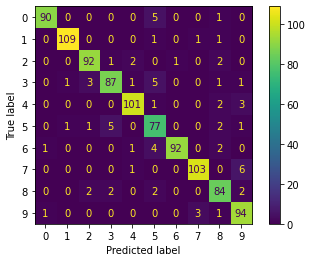

In [ ]:
x = plot_confusion_matrix(grid_random.best_estimator_, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,grid_random.best_estimator_.predict(X_test)))
print(metrics.f1_score(y_test,grid_random.best_estimator_.predict(X_test),average='macro'))

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(grid_random.cv_results_)[['param_estimator__base_estimator','params','mean_test_Accuracy']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,param_estimator__base_estimator,params,mean_test_Accuracy
0,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=3, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')","{'estimator__n_estimators': 100, 'estimator__learning_rate': 0.2, 'estimator__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')}",0.84775
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=4, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')","{'estimator__n_estimators': 300, 'estimator__learning_rate': 0.3, 'estimator__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')}",0.89800
2,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=4, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')","{'estimator__n_estimators': 200, 'estimator__learning_rate': 0.001, 'estimator__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')}",0.75200
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=5, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')","{'estimator__n_estimators': 500, 'estimator__learning_rate': 0.1, 'estimator__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=5, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')}",0.89000
4,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=4, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')","{'estimator__n_estimators': 300, 'estimator__learning_rate': 0.2, 'estimator__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')}",0.89725
5,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n max_depth=4, max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fracti

- After observing the trends during cross validation, lets create another model.

In [ ]:
final_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators = 1000,
    learning_rate = 0.18

)
final_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

0.932
0.93075455550084


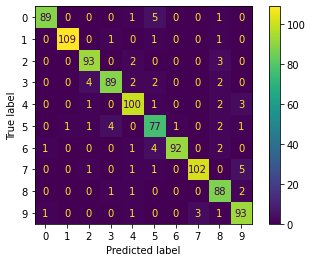

In [ ]:
x = plot_confusion_matrix(final_classifier, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,final_classifier.predict(X_test)))
print(metrics.f1_score(y_test,final_classifier.predict(X_test),average='macro'))

For more info about mechanism :

https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464